# 5 Clustering

## 5.1 Iris Dataset

### 5.1.2

In [34]:
%matplotlib inline
from sklearn import datasets

#load dataset 
iris = datasets.load_iris()
print(type(iris))
print(dir(iris),'\n')

#show description
print(iris['DESCR'])

#show data
print('feature names')
print(iris['feature_names'][:3], '\n')

print('sample data')
print(iris['data'][:3], '\n')

print('sample target')
print(iris['target'][:3], '\n')

print('target names')
print(iris['target_names'][:3], '\n')

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'target', 'target_names'] 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ======

## 5.2.2 implement K-Means

In [58]:
from sklearn import cluster
from sklearn import datasets

#load dataset 
iris = datasets.load_iris()
data = iris['data']

#clustering
n_clusters = 3
model = cluster.KMeans(n_clusters=n_clusters)

model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## 5.2.3 result

In [59]:
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


## 5.2.4 visualize result

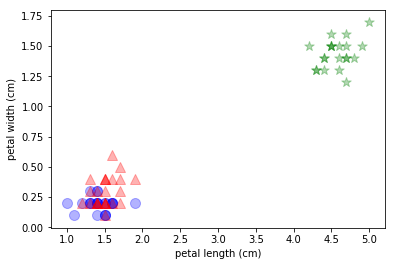

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

labels = model.labels_

ldata = data[labels==0]
plt.scatter(ldata[:,2], ldata[:,3], c='blue',
           alpha=0.3, s=100, marker='o')

ldata = data[labels==1]
plt.scatter(ldata[:,2], ldata[:,3], c='red',
           alpha=0.3, s=100, marker='^')

ldata = data[labels==2]
plt.scatter(ldata[:,2], ldata[:,3], c='green',
           alpha=0.3, s=100, marker='*')

plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])

plt.show()

In [61]:
#visualize with all combinations

def scatter_by_features(feature_idx1, feature_idx2):

    MARKERS = ['v','^','+','x','d','p','s','1','2'] 
    
    for label in range(labels.max()+1):
        clustered=data[labels==label]
    
        plt.scatter(clustered[:, feature_idx1], clustered[:, feature_idx2], 
                    c='black', alpha=0.3, s=100, marker=MARKERS[label], 
                    label = 'label {}'.format(label))
    plt.xlabel(iris['feature_names'][feature_idx1])
    plt.ylabel(iris['feature_names'][feature_idx2])

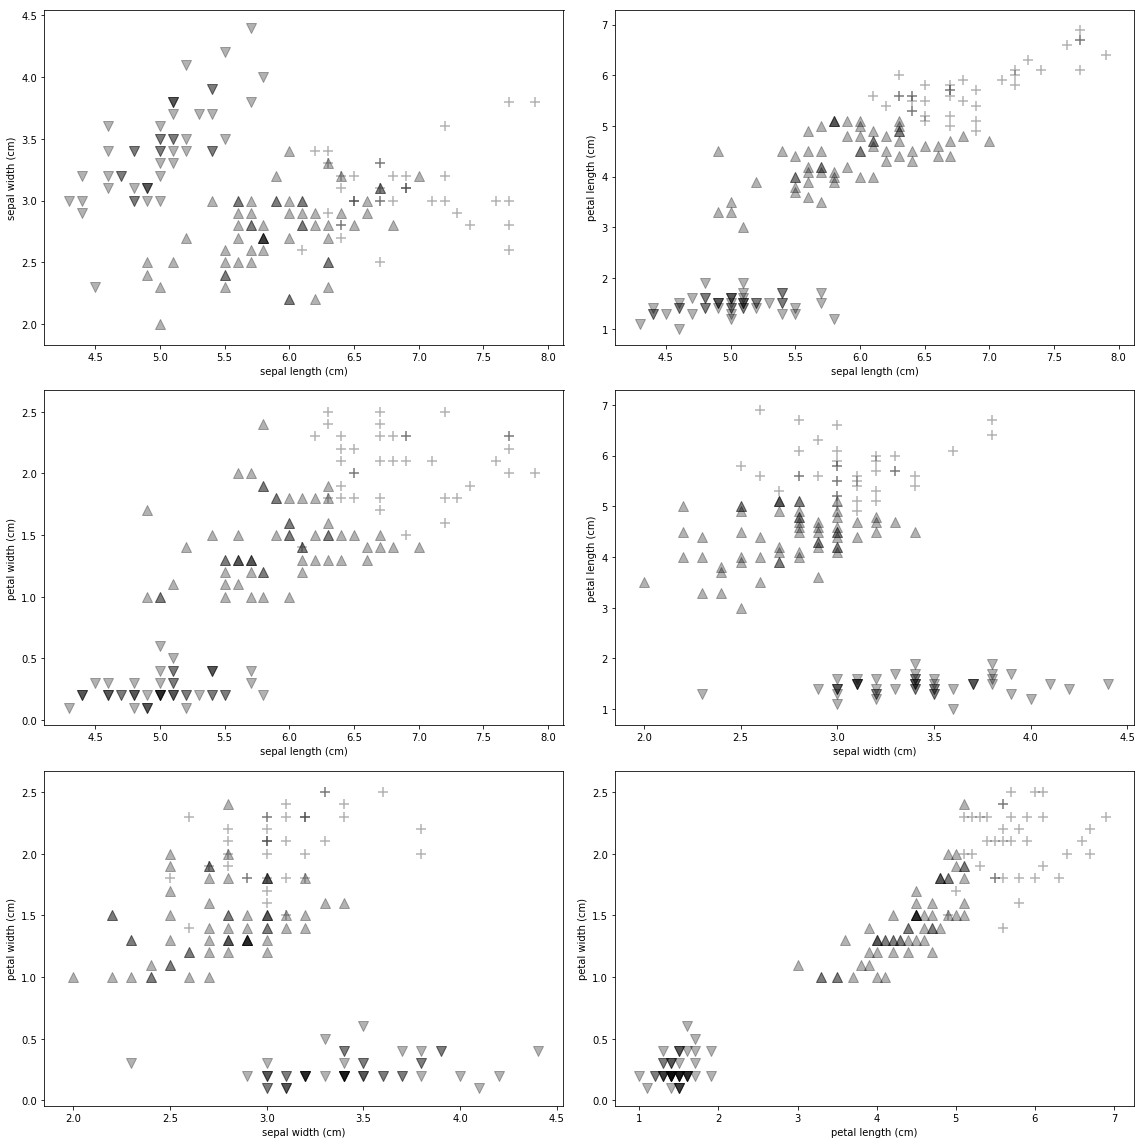

In [62]:
import itertools
import numpy as np

num_vert = 3
num_hori = 2
num_total = num_vert*num_hori

combinations = itertools.combinations(np.arange(4), 2)

plt.figure(figsize=(16, 16))

for i, c in enumerate(combinations):
    plt.subplot(num_vert, num_hori, i+1)
    scatter_by_features(c[0], c[1])

plt.tight_layout()
plt.show()

### evaluate performance

In [63]:
from sklearn import metrics
print(metrics.confusion_matrix(iris['target'], model.labels_))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


## 5.3 other clustering methods

### 5.3.1 hierarchical clustering - agglomerative

In [71]:
#implement with scikitlearn

model = cluster.AgglomerativeClustering(n_clusters=3,
                                       linkage='ward')

model.fit(data)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [72]:
print(metrics.confusion_matrix(iris['target'], model.labels_))

[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


## original part : implement with scipy

In [138]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pandas as pd
import numpy as np

#create pandas dataframe from iris dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

#agglomerative clustering
result = linkage(iris_df, method='ward', metric='euclidean')

threshold = 1/3 * np.max(result[:, 2])
labels_a = fcluster(result, threshold, criterion='distance')

#k-means
n_clusters = 3
model_k = cluster.KMeans(n_clusters=3)
model_k.fit(data)
labels_k = model.labels_


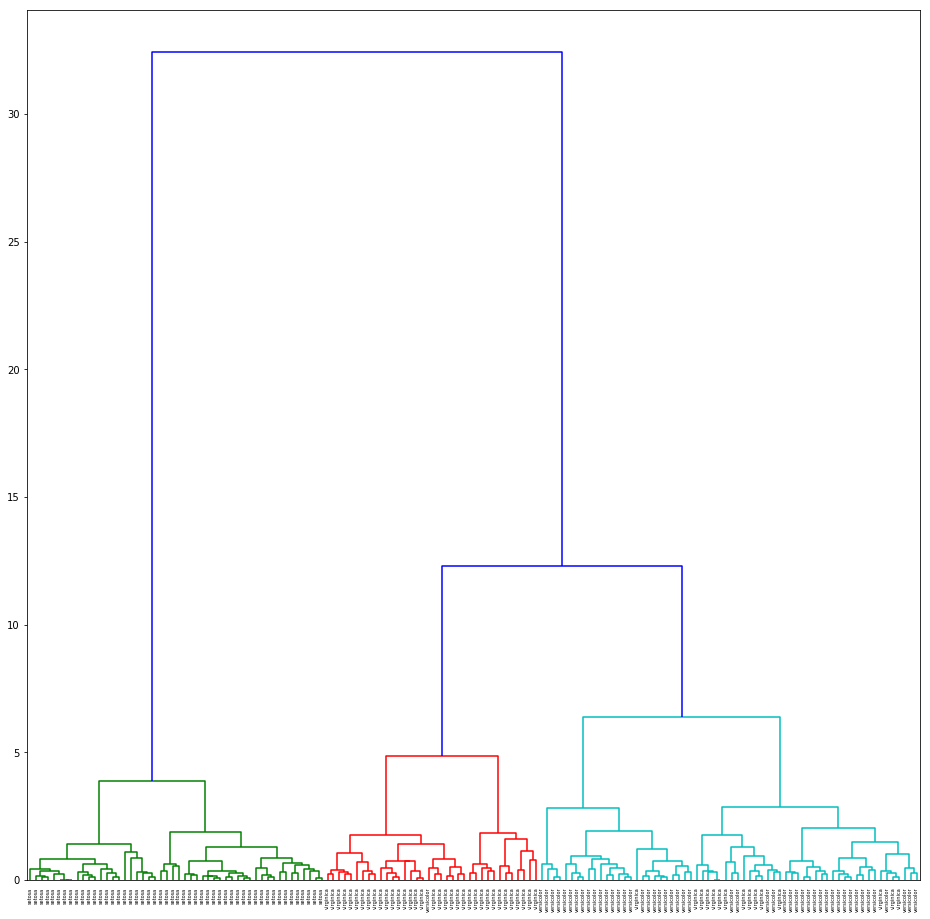

In [139]:
#create label dataframe, name dataframe, then left join
label_df = pd.DataFrame(iris.target, columns=['target'])
name_df = pd.DataFrame(np.c_[np.arange(len(iris.target_names)), iris.target_names],
                       columns=['target', 'target_names'])
name_df['target'] = name_df['target'].apply(int)

label_name_df = pd.merge(label_df, name_df, how='left')

#visualize dendrogram
plt.figure(figsize=(16, 16))
dendrogram(result,  labels=label_name_df['target_names'].values, 
           color_threshold=threshold)
plt.show()


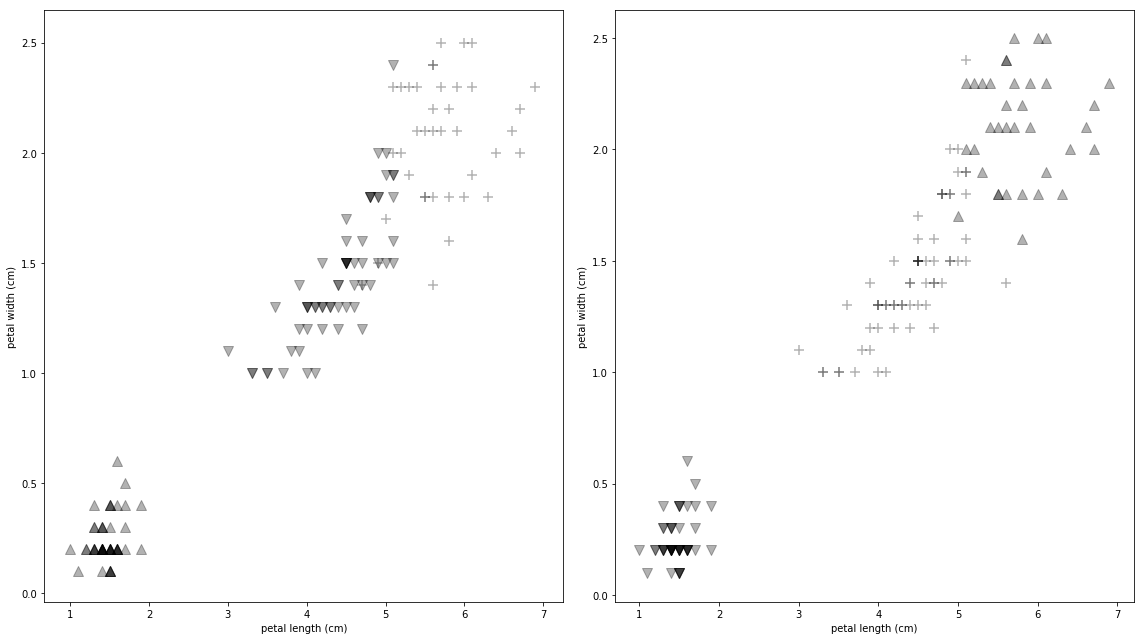

In [143]:
#visualize result
MARKERS = ['v','^','+','x','d','p','s','1','2']

plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
labels_k = model_k.labels_
for i in range(n_clusters):
    ldata = data[labels_k==i]
    plt.scatter(ldata[:,2], ldata[:,3], c='black',
               alpha=0.3, s=100, marker=MARKERS[i])
    
    plt.xlabel(iris['feature_names'][2])
    plt.ylabel(iris['feature_names'][3])


plt.subplot(1,2,2)
n_clusters = len(set(labels_a))

for i in range(n_clusters):
    ldata = data[labels_a==i+1]
    plt.scatter(ldata[:,2], ldata[:,3], c='black',
               alpha=0.3, s=100, marker=MARKERS[i])

    plt.xlabel(iris['feature_names'][2])
    plt.ylabel(iris['feature_names'][3])
    
plt.tight_layout()
plt.show()

## 5.3.2 affinity propagation

In [126]:
#affiniy propagation
model_a = cluster.AffinityPropagation()
model_a.fit(data)

#k-means
n_clusters = 3
model_k = cluster.KMeans(n_clusters=3)
model_k.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

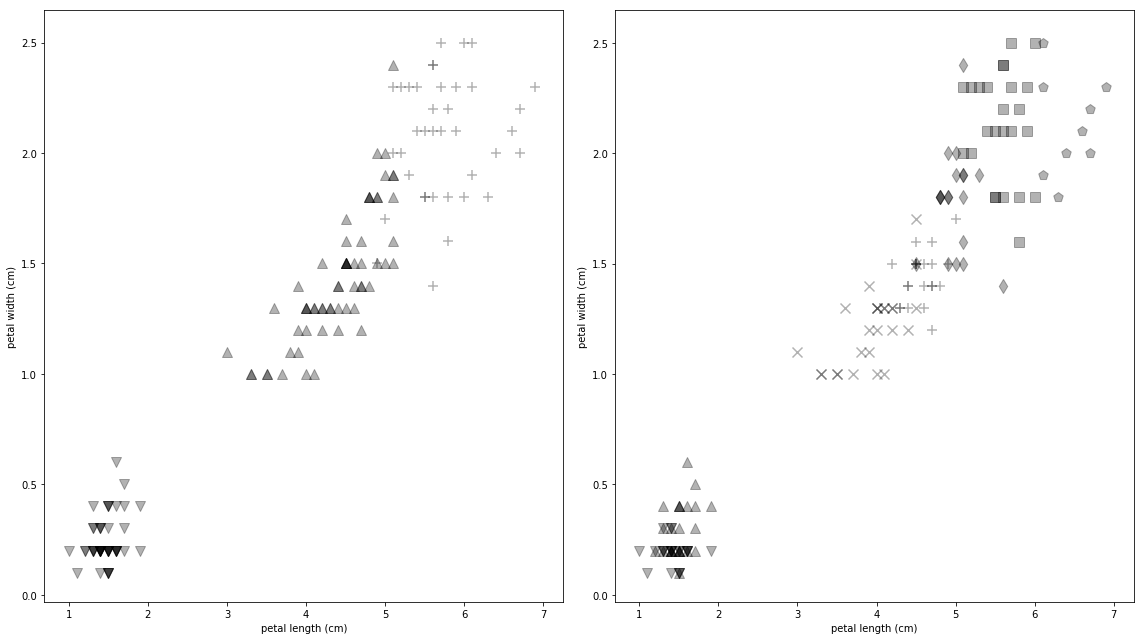

In [122]:
#visualize result
MARKERS = ['v','^','+','x','d','p','s','1','2']

plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
labels_k = model_k.labels_
for i in range(n_clusters):
    ldata = data[labels_k==i]
    plt.scatter(ldata[:,2], ldata[:,3], c='black',
               alpha=0.3, s=100, marker=MARKERS[i])
    
    plt.xlabel(iris['feature_names'][2])
    plt.ylabel(iris['feature_names'][3])


plt.subplot(1,2,2)
labels_a = model_a.labels_
n_clusters = len(set(labels_a))

for i in range(n_clusters):
    ldata = data[labels_a==i]
    plt.scatter(ldata[:,2], ldata[:,3], c='black',
               alpha=0.3, s=100, marker=MARKERS[i])

    plt.xlabel(iris['feature_names'][2])
    plt.ylabel(iris['feature_names'][3])
    
plt.tight_layout()
plt.show()